### Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import shap

## Загрузка данных

In [ ]:
df = pd.read_csv('winequalityN.csv')

In [ ]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.isna().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


Заполнение пропусков

In [ ]:
from sklearn.impute import KNNImputer

df_knn = df.drop('type', axis = 1)

imputer = KNNImputer(n_neighbors=3)
filled_data = imputer.fit_transform(df_knn)
df_filled = pd.DataFrame(filled_data, columns=df_knn.columns)

In [ ]:
df = pd.concat([df_filled, df['type']], axis = 1)

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6.0,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6.0,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6.0,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5.0,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.873333,11.2,6.0,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6.0,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5.0,red


In [ ]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216528,0.339640,0.318659,5.444836,0.056039,30.525319,115.744574,0.994697,3.218424,0.531281,10.491801,5.818378
std,1.295903,0.164566,0.145288,4.757490,0.035032,17.749400,56.521855,0.002999,0.160746,0.148833,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df['type'].value_counts()

,count
type,
white,4898
red,1599


In [ ]:
red_wine = df[df['type'] == 'red']
white_wine = df[df['type'] == 'white']

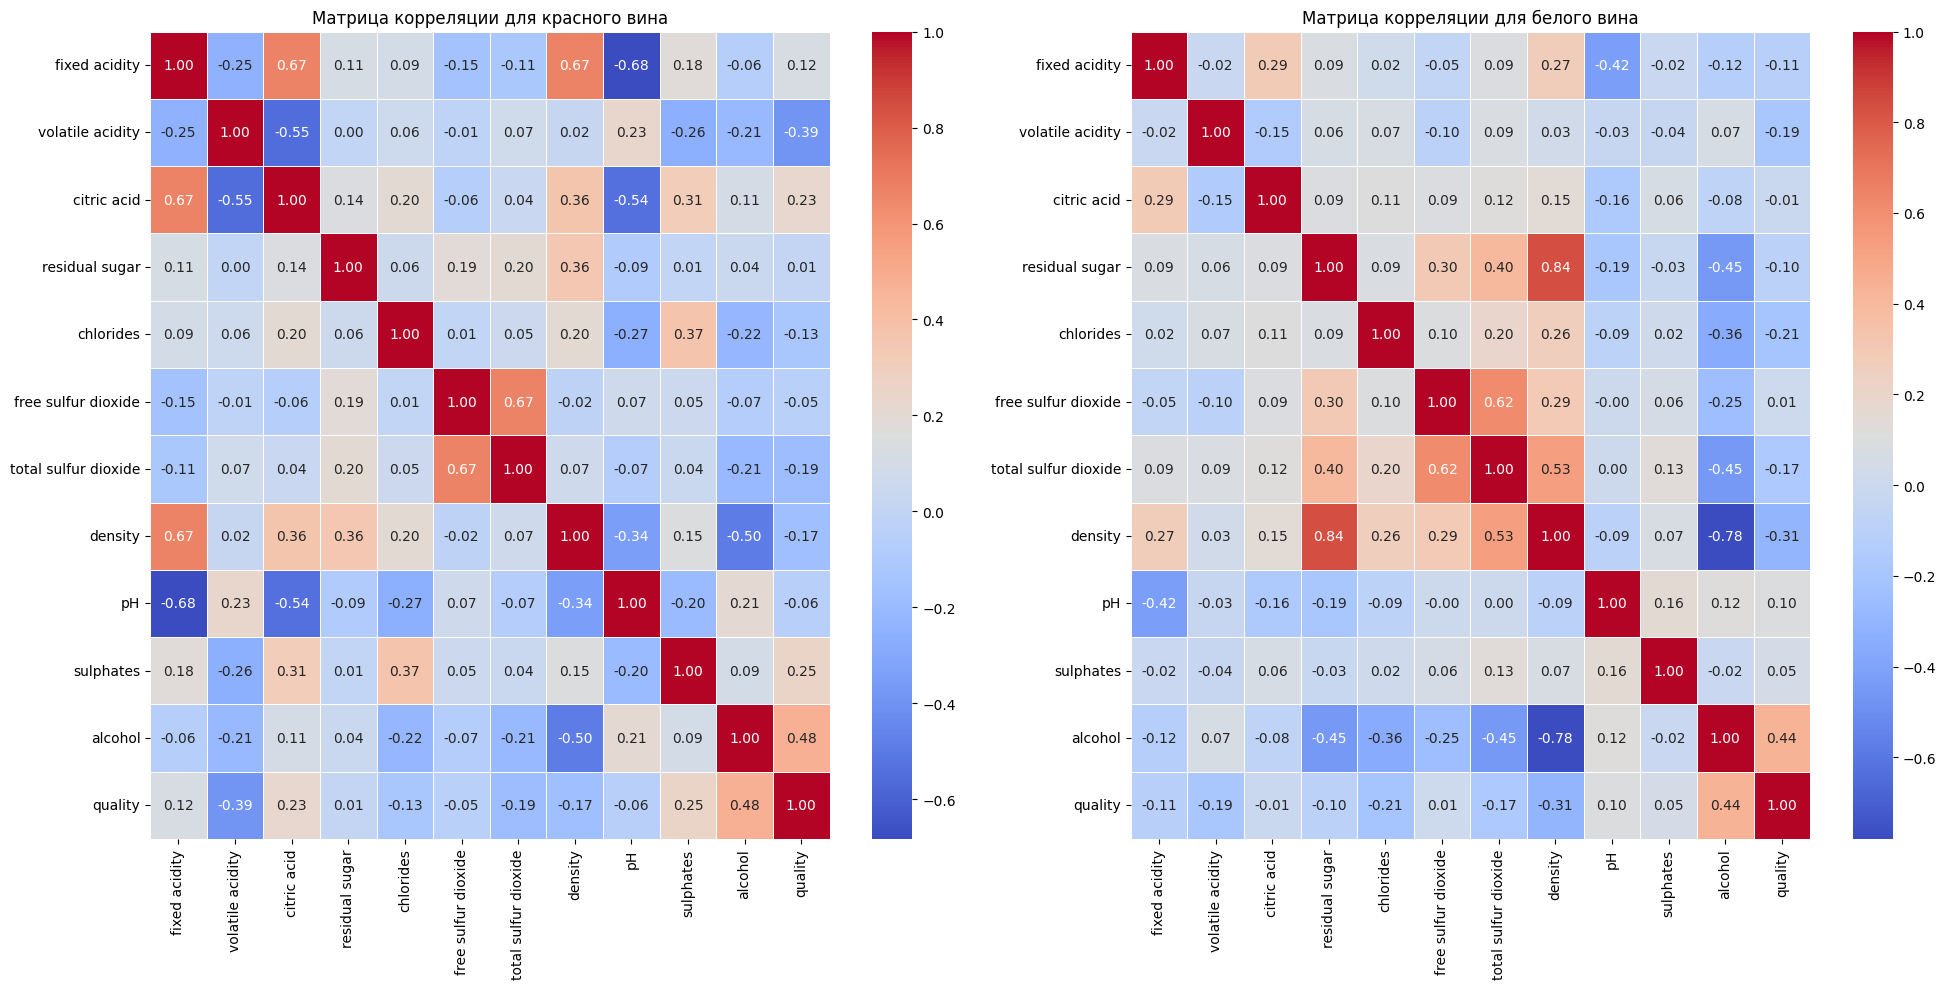

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(red_wine.drop('type', axis = 1).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Матрица корреляции для красного вина')

sns.heatmap(white_wine.drop('type', axis = 1).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Матрица корреляции для белого вина')

plt.tight_layout()
plt.show()

Красное вино:
1. Сильные линейные зависимости отсутствуют.
2. Между (fixed acidity и pH) (volatile acidity и citric acid) (volatile acidity и quality) (citric acid и pH) (density и pH) (density и alcohol) имеются средние отрицательные линейные зависимости.
3. Между (fixed acidity и citric acid) (fixed acidity
и density) (сitric acid и density) (residual sugar и density) (chlorides и sulphates) (free sulfur dioxide и total sulfur dioxide) (alcohol и quality) имеются средние положительные линейные зависимости.
4. Между остальными парами признаков линейные зависимости отсутствуют.
5. Слабая положительная корреляция между оценкой наблюдается у
признаков fixed acidity, citric acid, sulphates. Слабая отрицательная корреляция между оценкой наблюдается у признаков clorides, total sulfur dioxide, density. Средняя положительная корреляция между оценкой наблюдается у
признаков alchohol. Средняя отрицательная корреляция между оценкой наблюдается у признака volatile acidity. Корреляция между оценкой близка к нулю у признаков regular sugar, free sulfur dioxide, ph.

Таким образом, при проверке гипотезы о незначимости значения корреляции на качество, несмотря на
в целом низкие показатели, незначимыми оказались лишь 3
признака для красного вина: residual sugar, free sulfur dioxide, ph.



Белое вино:
1. Между (density и alcohol) имеются сильные отрицательные линейные зависимости
2. Между (density и residual sugar) имеются сильные положительные линейные зависимости.
3. Между (fixed acidity и pH) (alcohol и residual sugar) (alcohol и chlorides) (alcohol и total sulfur dioxide) (density и quality) имеются средние отрицательные линейные зависимости.
4. Между (fixed acidity и citric acid) (residual sugar и free sulfur dioxide) (residual sugar и total sulfur dioxide) (free sulfur dioxide и total sulfur dioxide) (total sulfur dioxide и density) (alcohol и quality) (fixed acidity
и density) имеются средние положительные линейные зависимости.
5. Между остальными парами признаков линейные зависимости отсутствуют.
6. Слабая отрицательная корреляция между оценкой наблюдается у признаков fixed acidity, volatile acidity, regular sugar, clorides, total sulfur dioxide, density. Средняя положительная корреляция между оценкой наблюдается у признаков alchohol. Корреляция между оценкой близка к нулю у признаков сitric acid, free sulfur dioxide, ph, sulphates.

Таким образом, при проверке гипотезы о незначимости значения корреляции на качество, несмотря на
в целом низкие показатели, незначимыми оказались лишь 4
признака для белого вина: сitric acid, free sulfur dioxide, ph, sulphates.

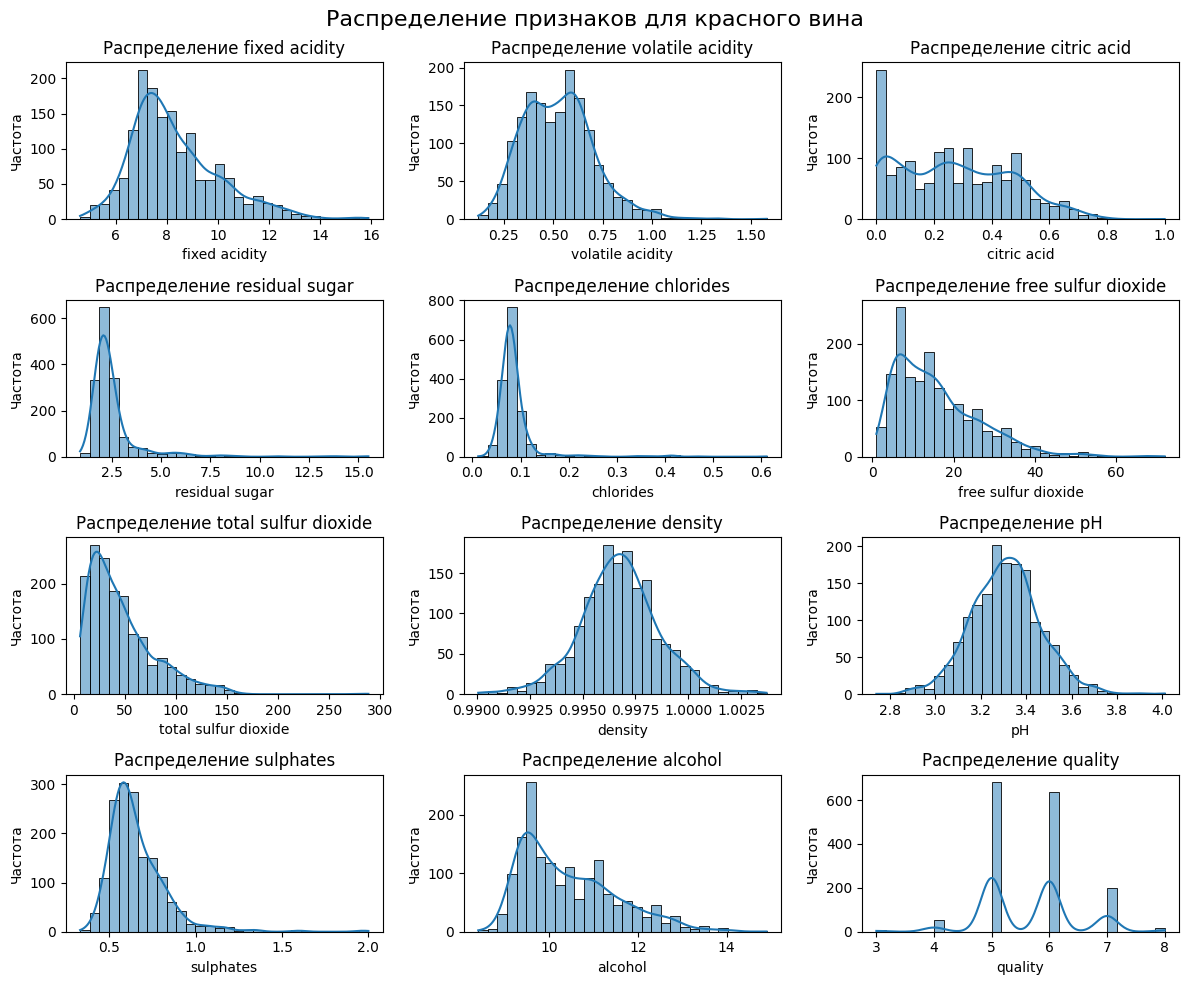

In [ ]:
features = red_wine.columns[:-1]

fig, axes = plt.subplots(4,3, figsize = (12,10))
axes = axes.flatten()

fig.suptitle('Распределение признаков для красного вина', fontsize=16)

for i, feature in enumerate(features):
    sns.histplot(red_wine[feature], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Распределение {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

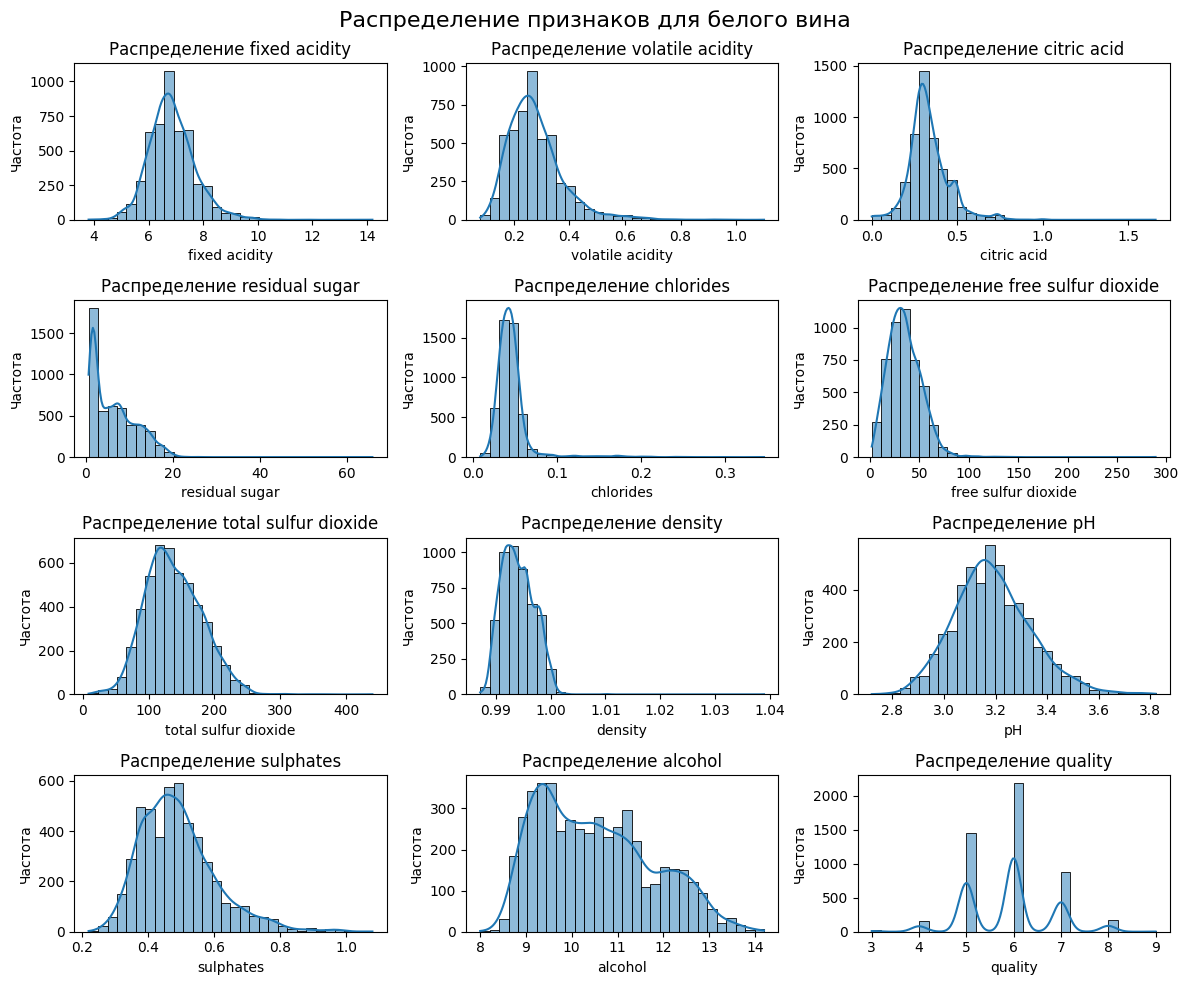

In [ ]:
fig, axes = plt.subplots(4,3, figsize = (12,10))
axes = axes.flatten()

fig.suptitle('Распределение признаков для белого вина', fontsize=16)

for i, feature in enumerate(features):
    sns.histplot(white_wine[feature], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Распределение {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

<ipython-input-44-59dc0bc7b4fa>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=red_wine, x='quality', y=feature, ci='sd', estimator='mean', capsize=0.1)
<ipython-input-44-59dc0bc7b4fa>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=red_wine, x='quality', y=feature, ci='sd', estimator='mean', capsize=0.1)
<ipython-input-44-59dc0bc7b4fa>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=red_wine, x='quality', y=feature, ci='sd', estimator='mean', capsize=0.1)
<ipython-input-44-59dc0bc7b4fa>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=red_wine, x='quality', y=feature, ci='sd', estimator='mean', capsize=0.1)
<ipython-input-44-59dc0bc7b4fa>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` fo

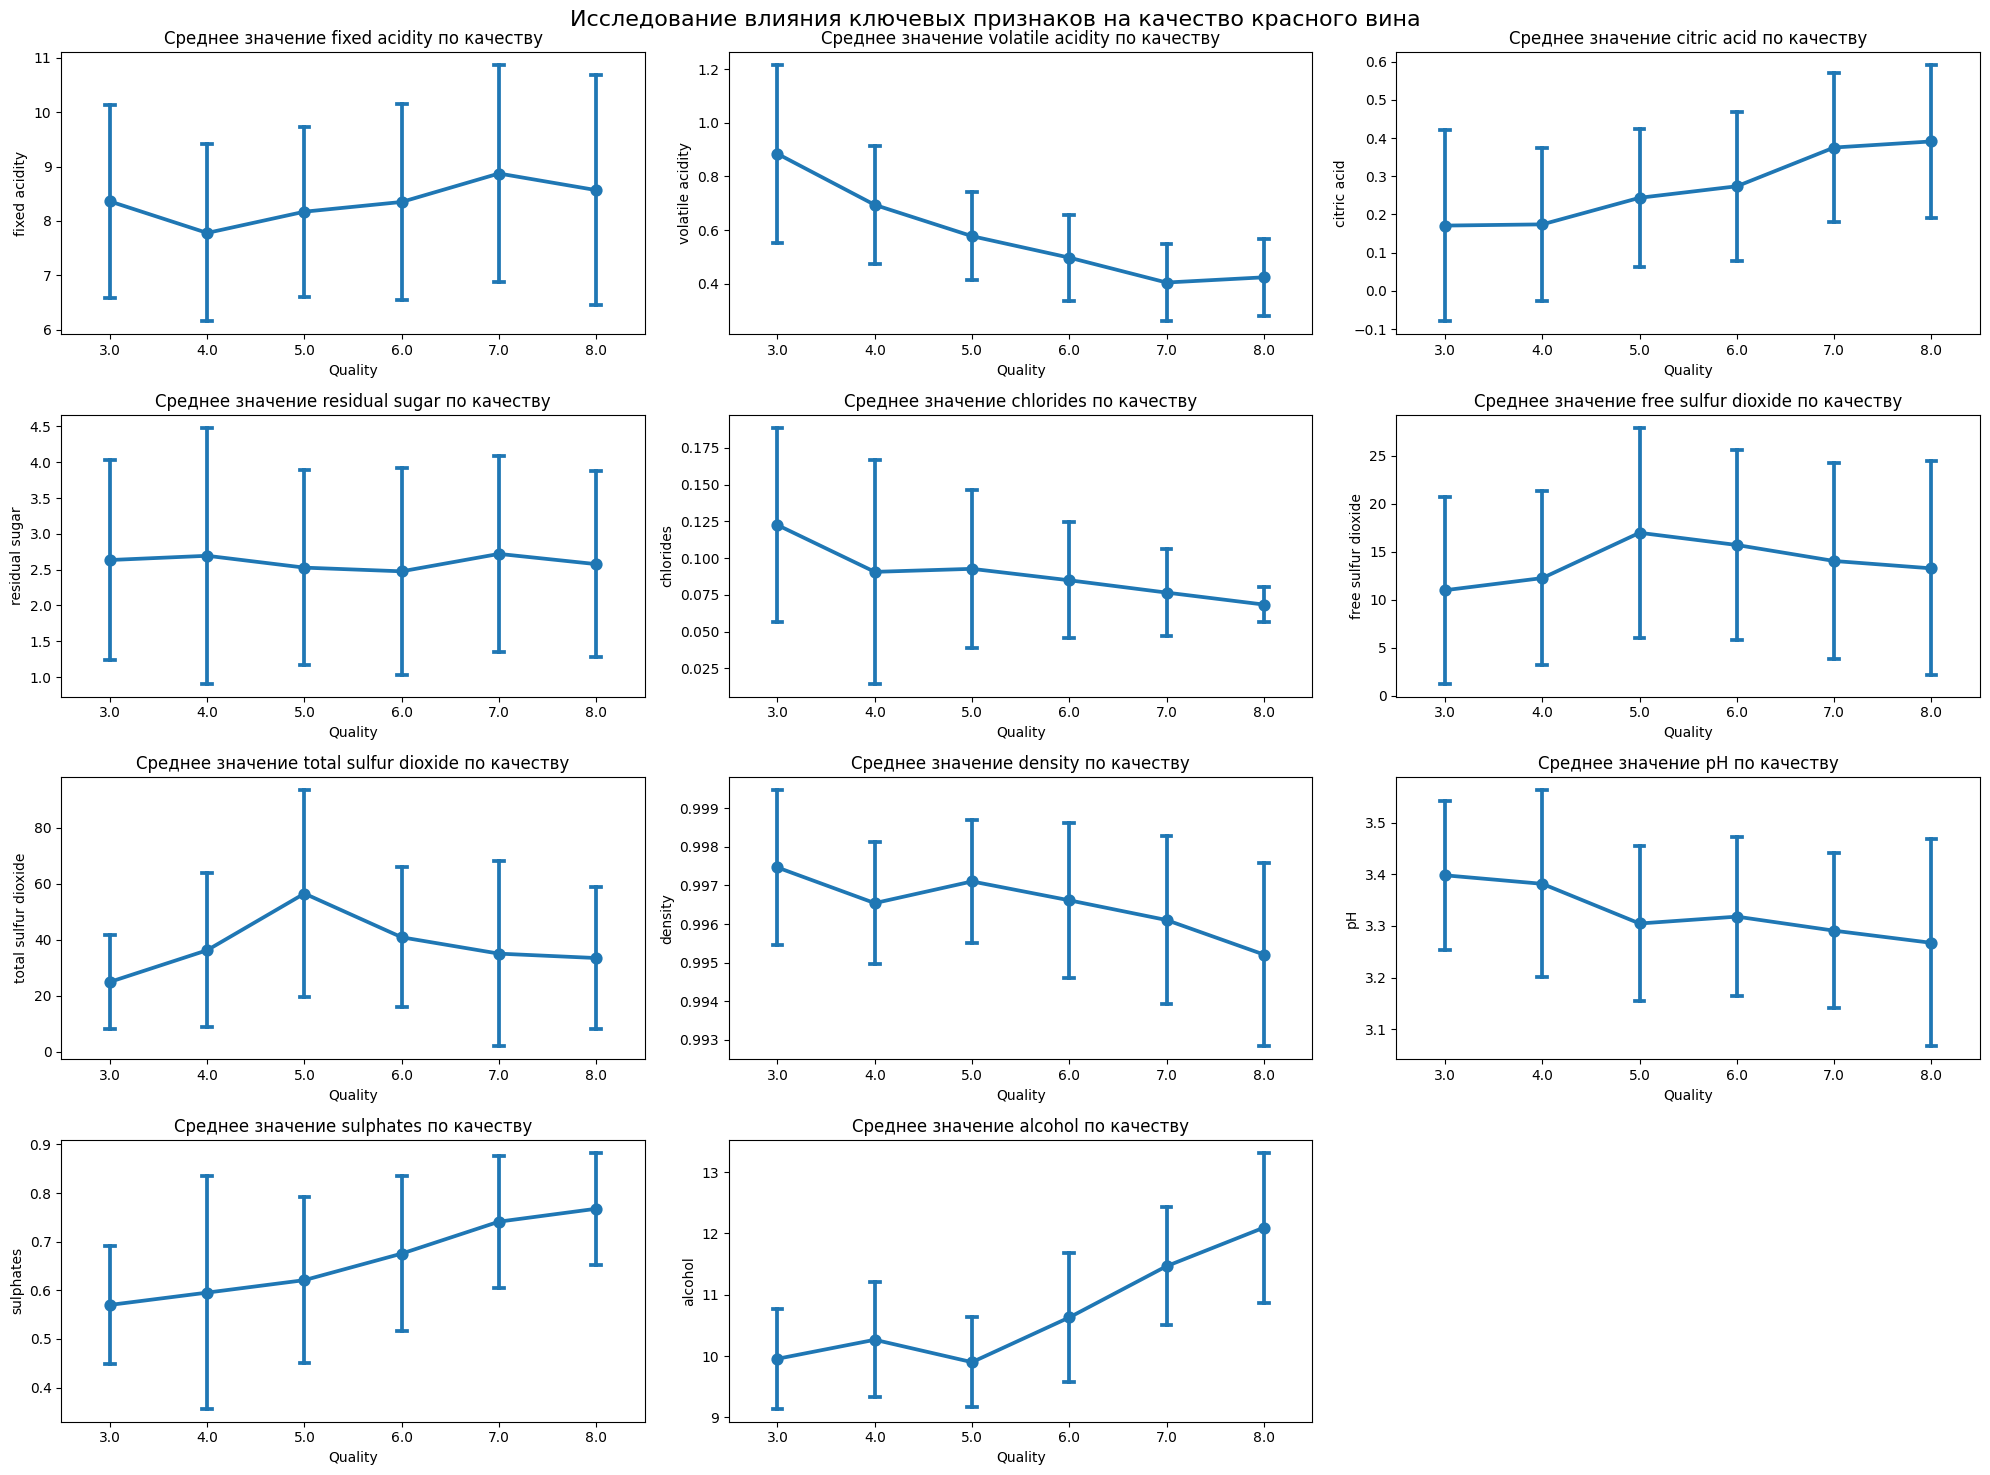

In [ ]:
plt.figure(figsize=(20, 15))

numeric_features = red_wine.columns[:-2]

plt.suptitle('Исследование влияния ключевых признаков на качество красного вина', fontsize=16)

for i, feature in enumerate(numeric_features):
    plt.subplot(4, 3, i + 1)
    sns.pointplot(data=red_wine, x='quality', y=feature, ci='sd', estimator='mean', capsize=0.1)
    plt.title(f'Среднее значение {feature} по качеству')
    plt.xlabel('Quality')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Красное вино:
1. С уменьшением количества летучей кислотности средняя оценка
увеличивается.
2. С увеличением количества лимонной кислоты средняя оценка
увеличивается. При этом у фиксированной кислоты, в которую входит лимонная
такая тенденция не сильно выражена.
3. С уменьшением количества хлоридов средняя оценка увеличивается.
4. С уменьшением плотности средняя оценка увеличивается.
5. С уменьшением числа ph средняя оценка увеличивается.
6. С увеличением количества сульфатов оценка увеличивается.
7. С увеличением количества алкоголя средняя оценка увеличивается. Более
алкогольные вина имеют более высокие оценки.
8. В остальных признаках (residual sugar, free sulfur dioxide, total sulfur dioxide) не наблюдается какой то четко выраженной линейной зависимости на качество вина.

Таким образом, из данного анализа, на качество красного вина влияют следующие признаки: volatile acidity, citric acid, fixed acidity, chlorides, density, ph, sulphates, alcohol.

<ipython-input-45-a1935000d376>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=white_wine, x='quality', y=feature, ci='sd', estimator='mean', capsize=0.1)
<ipython-input-45-a1935000d376>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=white_wine, x='quality', y=feature, ci='sd', estimator='mean', capsize=0.1)
<ipython-input-45-a1935000d376>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=white_wine, x='quality', y=feature, ci='sd', estimator='mean', capsize=0.1)
<ipython-input-45-a1935000d376>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=white_wine, x='quality', y=feature, ci='sd', estimator='mean', capsize=0.1)
<ipython-input-45-a1935000d376>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=

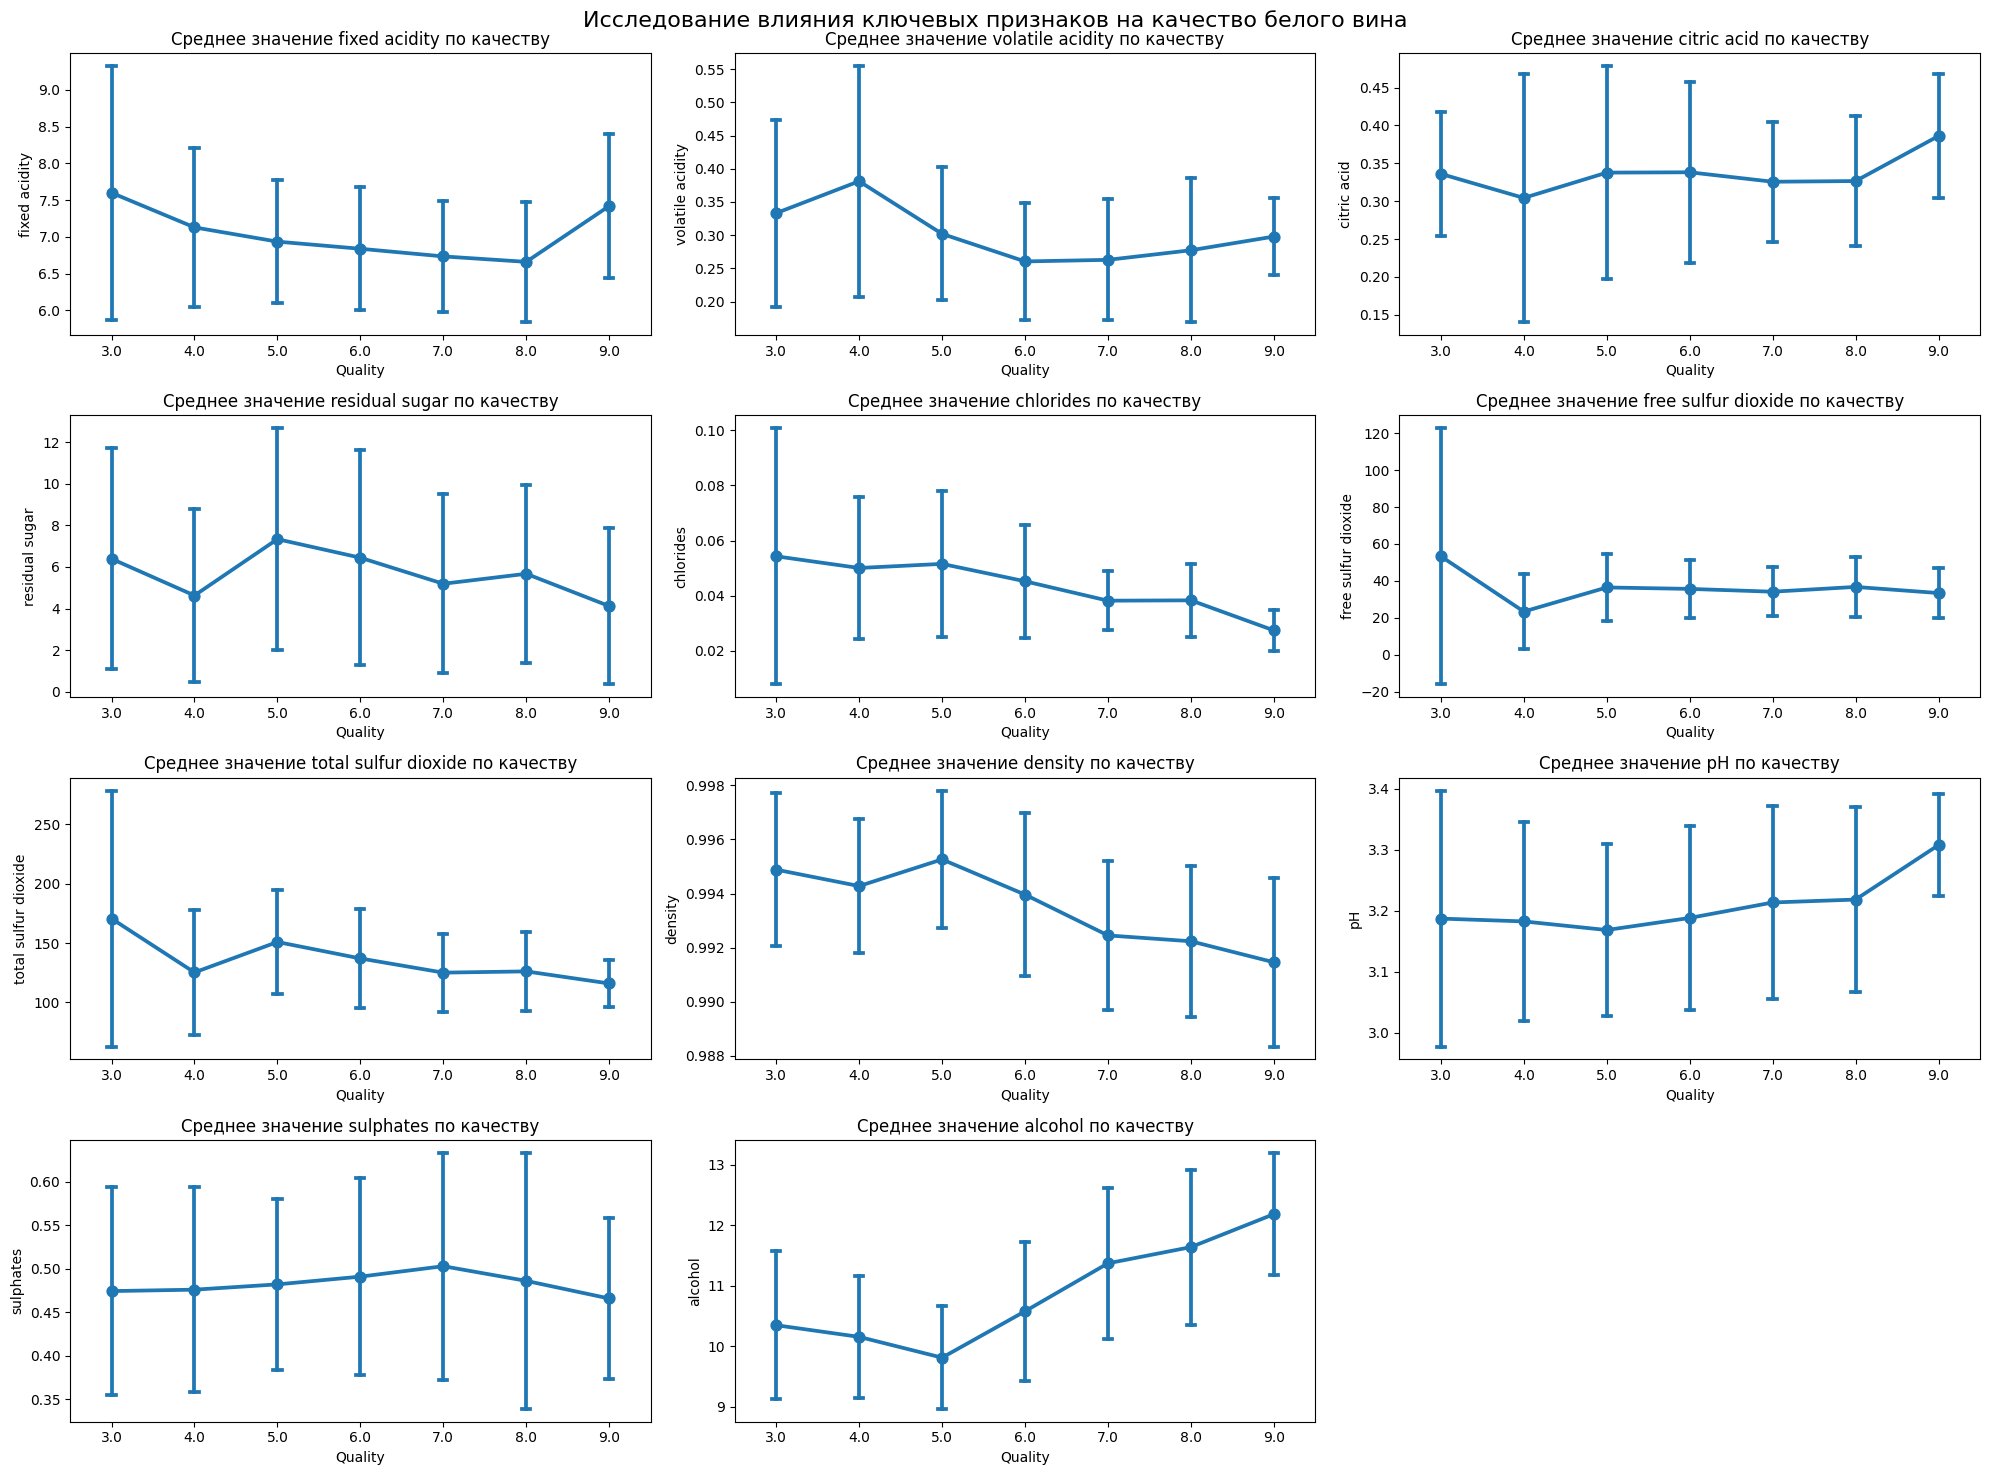

In [ ]:
plt.figure(figsize=(20, 15))

plt.suptitle('Исследование влияния ключевых признаков на качество белого вина', fontsize=16)

for i, feature in enumerate(numeric_features):
    plt.subplot(4, 3, i + 1)
    sns.pointplot(data=white_wine, x='quality', y=feature, ci='sd', estimator='mean', capsize=0.1)
    plt.title(f'Среднее значение {feature} по качеству')
    plt.xlabel('Quality')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Белое вино:
1. С уменьшением количества фиксированной кислоты средняя оценка увеличивается (кроме 9).
1. С уменьшением количества хлоридов средняя оценка увеличивается.
2. С уменьшением плотности средняя оценка увеличивается.
3. С увеличением числа ph средняя оценка увеличивается.
4. С увеличением количества алкоголя средняя оценка увеличивается.
6. В остальных признаках (volatile acidity, citric acid, residual sugar, free sulfur dioxide, total sulfur dioxide, sulphates) не наблюдается какой то четко выраженной линейной зависимости на качество вина.

Таким образом, из данного анализа, на качество белого вина влияют следующие признаки: fixed acidity, chlorides, density, ph, alcohol.

### 3. Классификация вина по его качеству

**Цель**


    1. Сравнить точность классификации для красного и белого вина.
    2. Проанализировать чувствительность модели к различным характеристикам.
    3. Исследовать влияние нормализации на точность моделей.

In [ ]:
# Создание категорий
df['quality_label'] = df['quality'].apply(lambda x: 'low' if x <= 5 else 'high' if x >= 7 else 'medium')

In [ ]:
df['quality_label']

,quality_label
0,medium
1,medium
2,medium
3,medium
4,medium
...,...
6492,low
6493,medium
6494,medium
6495,low


In [ ]:
# Разделение на красные и белые вина
red_wine = df[df['type'] == 'red']
white_wine = df[df['type'] == 'white']

In [ ]:
red_wine.shape

(1599, 14)

In [ ]:
y_red_wine = red_wine['quality_label']
y_white_wine = white_wine['quality_label']

In [ ]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red,low
4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red,low
4900,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,red,low
4901,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,red,medium
4902,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red,low


In [ ]:
X_red_wine = red_wine.drop(columns=['quality', 'quality_label', 'type'])
X_white_wine = white_wine.drop(columns=['quality', 'quality_label', 'type'])

In [ ]:
X_train_red_wine, X_test_red_wine, y_train_red_wine, y_test_red_wine = train_test_split(X_red_wine, y_red_wine, test_size=0.2, random_state=42)
X_train_white_wine, X_test_white_wine, y_train_white_wine, y_test_white_wine = train_test_split(X_white_wine, y_white_wine, test_size=0.2, random_state=42)

In [ ]:
# Обучение модели без нормализации для красного вина
model_red_wine_no_scaler = RandomForestClassifier(random_state=42)
model_red_wine_no_scaler.fit(X_train_red_wine, y_train_red_wine)

RandomForestClassifier(random_state=42)

In [ ]:
# Оценка модели
y_pred_red_wine_no_scaler = model_red_wine_no_scaler.predict(X_test_red_wine)
print("Отчет классификации красного вина (без нормализации):\n", classification_report(y_test_red_wine, y_pred_red_wine_no_scaler))

Отчет классификации красного вина (без нормализации):
               precision    recall  f1-score   support

        high       0.69      0.53      0.60        47
         low       0.76      0.81      0.78       141
      medium       0.63      0.64      0.64       132

    accuracy                           0.70       320
   macro avg       0.70      0.66      0.68       320
weighted avg       0.70      0.70      0.70       320



In [ ]:
# Обучение модели без нормализации для белого вина
model_white_wine_no_scaler = RandomForestClassifier(random_state=42)
model_white_wine_no_scaler.fit(X_train_white_wine, y_train_white_wine)

RandomForestClassifier(random_state=42)

In [ ]:
# Оценка модели
y_pred_white_wine_no_scaler = model_white_wine_no_scaler.predict(X_test_white_wine)
print("Отчет классификации белого вина (без нормализации):\n", classification_report(y_test_white_wine, y_pred_white_wine_no_scaler))

Отчет классификации белого вина (без нормализации):
               precision    recall  f1-score   support

        high       0.84      0.69      0.76       227
         low       0.76      0.74      0.75       321
      medium       0.70      0.78      0.74       432

    accuracy                           0.75       980
   macro avg       0.77      0.74      0.75       980
weighted avg       0.75      0.75      0.75       980



Как  можем видеть в случае классификации с рандомфорест на данных без нормализации точноть предсказания качественного вина выше для белого. Вино низкого качества не намного лучше предсказывается (точность выше) в случае красного вина. Для среднего по качеству вина точность выше для белого

Нормализация данных

In [ ]:
scaler_red_wine = StandardScaler()
X_red_wine_scaler = scaler_red_wine.fit_transform(X_red_wine)
scaler_white_wine = StandardScaler()
X_white_wine_scaler = scaler_white_wine.fit_transform(X_white_wine)

In [ ]:
X_train_red_wine_scaler, X_test_red_wine_scaler, y_train_red_wine, y_test_red_wine = train_test_split(X_red_wine_scaler, y_red_wine, test_size=0.2, random_state=42)
X_train_white_wine_scaler, X_test_white_wine_scaler, y_train_white_wine, y_test_white_wine = train_test_split(X_white_wine_scaler, y_white_wine, test_size=0.2, random_state=42)

In [ ]:
# Обучение модели на масштабированных данных для красного вина
model_red_wine_scaler = RandomForestClassifier(random_state=42)
model_red_wine_scaler.fit(X_train_red_wine_scaler, y_train_red_wine)

RandomForestClassifier(random_state=42)

In [ ]:
# Оценка модели
y_pred_red_wine_scaler = model_red_wine_scaler.predict(X_test_red_wine_scaler)
print("Отчет классификации красного вина (на масштабированных данных):\n", classification_report(y_test_red_wine, y_pred_red_wine_scaler))

Отчет классификации красного вина (на масштабированных данных):
               precision    recall  f1-score   support

        high       0.69      0.53      0.60        47
         low       0.75      0.81      0.78       141
      medium       0.63      0.64      0.63       132

    accuracy                           0.70       320
   macro avg       0.69      0.66      0.67       320
weighted avg       0.70      0.70      0.69       320



In [ ]:
# Обучение модели на масштабированных данных для белого вина
model_white_wine_scaler = RandomForestClassifier(random_state=42)
model_white_wine_scaler.fit(X_train_white_wine_scaler, y_train_white_wine)

RandomForestClassifier(random_state=42)

In [ ]:
# Оценка модели
y_pred_white_wine_scaler = model_white_wine_scaler.predict(X_test_white_wine_scaler)
print("Отчет классификации белого вина (на масштабированных данных):\n", classification_report(y_test_white_wine, y_pred_white_wine_scaler))

Отчет классификации белого вина (на масштабированных данных):
               precision    recall  f1-score   support

        high       0.84      0.70      0.76       227
         low       0.77      0.74      0.75       321
      medium       0.70      0.78      0.74       432

    accuracy                           0.75       980
   macro avg       0.77      0.74      0.75       980
weighted avg       0.76      0.75      0.75       980



Как видим в случае использования рандомфорест для классификации нормализация не играет существенную роль. Точность предсказания отличается в некоторых случаях на всего 0.01.

### Анализ важности признаков

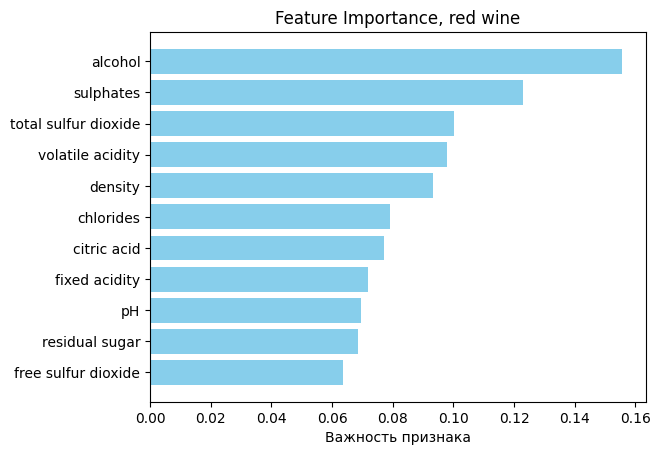

                 Feature  Importance
10               alcohol    0.155766
9              sulphates    0.122963
6   total sulfur dioxide    0.100148
1       volatile acidity    0.097992
7                density    0.093375
4              chlorides    0.079057
2            citric acid    0.077130
0          fixed acidity    0.071790
8                     pH    0.069518
3         residual sugar    0.068581
5    free sulfur dioxide    0.063681


In [ ]:
# Важность признаков
feature_importances = pd.DataFrame({
    'Feature': X_red_wine.columns,
    'Importance': model_red_wine_scaler.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Визуализация
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Важность признака')
plt.title('Feature Importance, red wine')
plt.gca().invert_yaxis()
plt.show()

print(feature_importances)

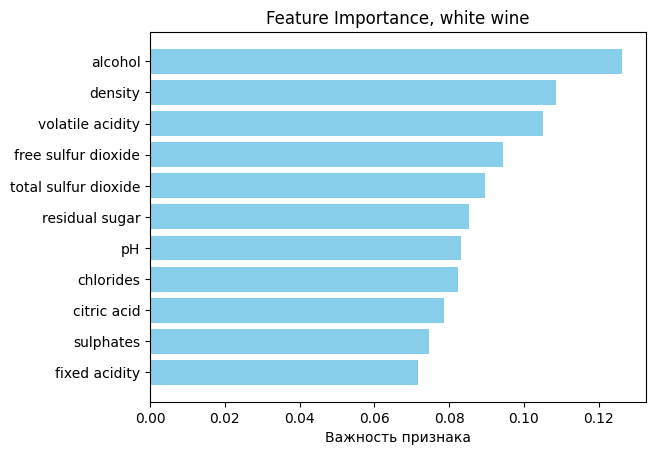

                 Feature  Importance
10               alcohol    0.126338
7                density    0.108634
1       volatile acidity    0.105025
5    free sulfur dioxide    0.094352
6   total sulfur dioxide    0.089699
3         residual sugar    0.085277
8                     pH    0.083253
4              chlorides    0.082370
2            citric acid    0.078702
9              sulphates    0.074668
0          fixed acidity    0.071682


In [ ]:
# Важность признаков
feature_importances = pd.DataFrame({
    'Feature': X_white_wine.columns,
    'Importance': model_white_wine_scaler.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Визуализация
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Важность признака')
plt.title('Feature Importance, white wine')
plt.gca().invert_yaxis()
plt.show()

print(feature_importances)

Как видим для точности предсказания красного вина наибольшим по важности является  'alcohol' и'sulphates'. А для белого вина - 'alcohol', 'density' и 'volatile acidity'

### Оценка и анализ параметров модели

Для красного вина:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model_red_wine_scaler, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train_red_wine_scaler, y_train_red_wine)

print(f"Лучшие параметры для предсказания качества красного вина: {grid_search.best_params_}")
print(f"Лучшая точность: {grid_search.best_score_}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Лучшие параметры для предсказания качества красного вина: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Лучшая точность: 0.6857062227646389


Для белого вина:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model_white_wine_scaler, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train_white_wine_scaler, y_train_white_wine)

print(f"Лучшие параметры для предсказания качества белого вина: {grid_search.best_params_}")
print(f"Лучшая точность: {grid_search.best_score_}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Лучшие параметры для предсказания качества белого вина: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Лучшая точность: 0.6822358346094948


In [ ]:
# Обучение модели на масштабированных данных для красного вина на лучших параметрах
model_red_wine_scaler_best_param = RandomForestClassifier(random_state=42, max_depth=None, min_samples_split=10, n_estimators=100)
model_red_wine_scaler_best_param.fit(X_train_red_wine_scaler, y_train_red_wine)

RandomForestClassifier(min_samples_split=10, random_state=42)

In [ ]:
# Оценка модели c лучшими параметрами
y_pred_red_wine_scaler_best_param  = model_red_wine_scaler_best_param.predict(X_test_red_wine_scaler)
print("Отчет классификации красного вина (на масштабированных данных):\n", classification_report(y_test_red_wine, y_pred_red_wine_scaler_best_param))

Отчет классификации красного вина (на масштабированных данных):
               precision    recall  f1-score   support

        high       0.70      0.40      0.51        47
         low       0.74      0.79      0.77       141
      medium       0.60      0.64      0.62       132

    accuracy                           0.68       320
   macro avg       0.68      0.61      0.63       320
weighted avg       0.68      0.68      0.67       320



In [ ]:
# Оценка модели cо стандартными параметрами (по умолчанию)
y_pred_red_wine_scaler = model_red_wine_scaler.predict(X_test_red_wine_scaler)
print("Отчет классификации красного вина (на масштабированных данных):\n", classification_report(y_test_red_wine, y_pred_red_wine_scaler))

Отчет классификации красного вина (на масштабированных данных):
               precision    recall  f1-score   support

        high       0.70      0.40      0.51        47
         low       0.74      0.79      0.77       141
      medium       0.60      0.64      0.62       132

    accuracy                           0.68       320
   macro avg       0.68      0.61      0.63       320
weighted avg       0.68      0.68      0.67       320



Разницу для красного вина не наблюдаем т.к. параметры по умолчанию оказались лучшими)) По умолчанию 'n_estimators': 100 и max_depth=None. min_samples_split=10 видимо не вносит существенный вклад

In [ ]:
# Обучение модели на масштабированных данных для белого вина на лучших параметрах
model_white_wine_scaler_best_param = RandomForestClassifier(random_state=42, max_depth=20, min_samples_split=2, n_estimators=100)
model_white_wine_scaler_best_param.fit(X_train_white_wine_scaler, y_train_white_wine)

RandomForestClassifier(max_depth=20, random_state=42)

In [ ]:
# Оценка модели c лучшими параметрами
y_pred_white_wine_scaler_best_param  = model_white_wine_scaler_best_param.predict(X_test_white_wine_scaler)
print("Отчет классификации белого вина (на масштабированных данных):\n", classification_report(y_test_white_wine, y_pred_white_wine_scaler_best_param))

Отчет классификации белого вина (на масштабированных данных):
               precision    recall  f1-score   support

        high       0.83      0.71      0.77       227
         low       0.75      0.74      0.74       321
      medium       0.70      0.76      0.73       432

    accuracy                           0.74       980
   macro avg       0.76      0.74      0.74       980
weighted avg       0.74      0.74      0.74       980



In [ ]:
# Оценка модели
y_pred_white_wine_scaler = model_white_wine_scaler.predict(X_test_white_wine_scaler)
print("Отчет классификации белого вина (на масштабированных данных):\n", classification_report(y_test_white_wine, y_pred_white_wine_scaler))

Отчет классификации белого вина (на масштабированных данных):
               precision    recall  f1-score   support

        high       0.84      0.70      0.76       227
         low       0.77      0.74      0.75       321
      medium       0.70      0.78      0.74       432

    accuracy                           0.75       980
   macro avg       0.77      0.74      0.75       980
weighted avg       0.76      0.75      0.75       980



Тут существенную разницу не наблюдаем. Т.к. параметры по умолчанию  'n_estimators': 100 и min_samples_split=2 также оказались лучшими

---



Выводы:
1. Точность прогнозирования качества вина отличается для красного и белого. Точноть предсказания качественного вина выше для белого.
2. Нормализация не влияет на точность предсказания качества
3. Для точности предсказания красного вина наибольшим по важности является 'alcohol' и'sulphates'. А для белого вина - 'alcohol', 'density' и 'volatile acidity'
4. Параметры по умолчанию оказались лучшими для предсказания качества вина

### 4.	Прогнозирование рейтинга вина (регрессия).

In [ ]:
# Закодируем категориальный столбец 'type' с помощью OneHotEncoding
data = pd.get_dummies(data, columns=['type'], drop_first=True)

In [ ]:
# Определение целевой переменной и признаков
target_column = 'quality'
feature_columns = [col for col in data.columns if col != target_column]

X = data[feature_columns]
y = data[target_column]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
reg_model = GradientBoostingRegressor(random_state=42)
reg_model.fit(X_train, y_train)

# Оценка модели
y_pred = reg_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 0.5123730608879021
RMSE: 0.6459183487023619


# Эксперименты

In [ ]:
def train_and_evaluate(X, y):
    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Обучение модели
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Оценка модели
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    return mae, rmse

# Эксперимент: сравнение красного и белого вина
def experiment_1():
    results = {}
    for wine_type, label in [(0, "Red Wine"), (1, "White Wine")]:
        # Фильтруем данные по типу вина
        X_type = X[X['type_white'] == wine_type]
        y_type = y[X['type_white'] == wine_type]

        # Обучаем и оцениваем модель
        mae, rmse = train_and_evaluate(X_type, y_type)
        results[label] = {"MAE": mae, "RMSE": rmse}

    for wine_type, metrics in results.items():
        print(f"{wine_type}: MAE = {metrics['MAE']:.2f}, RMSE = {metrics['RMSE']:.2f}")

# Запуск эксперимента
experiment_1()


Red Wine: MAE = 0.48, RMSE = 0.60
White Wine: MAE = 0.53, RMSE = 0.68


Модель предсказывает качество красного вина точнее, чем белого, поскольку как MAE, так и RMSE ниже.

In [ ]:
data = data.apply(pd.to_numeric, errors='coerce')

Feature Importances:
                 Feature  Importance
10               alcohol    0.438064
1       volatile acidity    0.173555
5    free sulfur dioxide    0.091845
9              sulphates    0.065135
3         residual sugar    0.055444
6   total sulfur dioxide    0.045174
2            citric acid    0.034452
8                     pH    0.031433
4              chlorides    0.023774
7                density    0.018433
0          fixed acidity    0.014892
11            type_white    0.007799


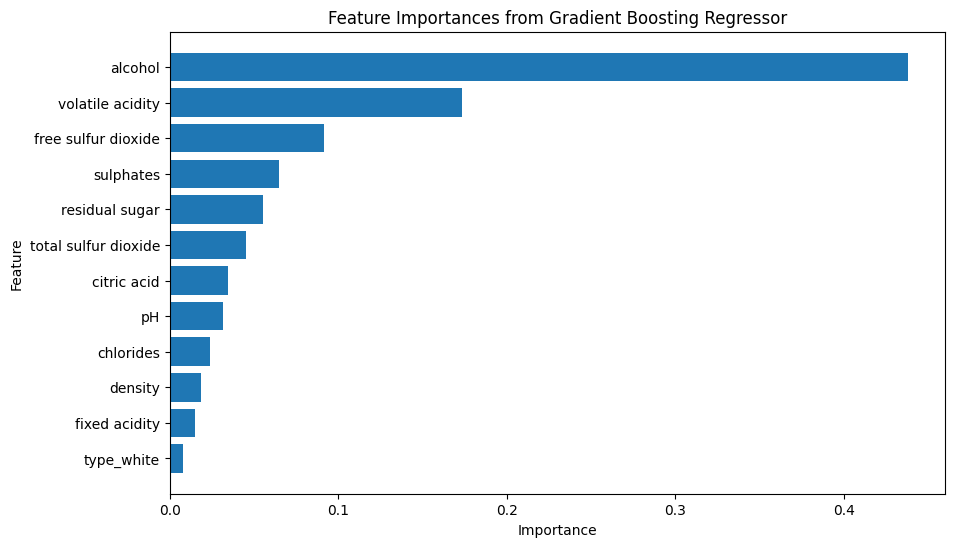

In [ ]:
# Важность признаков
feature_importances = model.feature_importances_
feature_names = X.columns

# Вывод важности
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from Gradient Boosting Regressor")
plt.gca().invert_yaxis()
plt.show()


Алкоголь, летучая кислота, и свободный диоксид серы оказывают наибольшее влияние.


Признаки вроде плотности, фиксированной кислотности и хлоридов играют менее важную роль.

In [ ]:
# Определяем целевую переменную и признаки
target_column = 'quality'
feature_columns = [col for col in data.columns if col != target_column]

X = data[feature_columns].astype(float)
y = data[target_column].astype(float)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация для моделей, чувствительных к масштабу данных (например, Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Функция для обучения и оценки модели
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Обучение и оценка модели"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    return mae, rmse

# Сравнение моделей
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Linear Regression": LinearRegression()
}

results = {}

for name, model in models.items():
    # Используем нормализованные данные только для Linear Regression
    if name == "Linear Regression":
        mae, rmse = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    else:
        mae, rmse = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"MAE": mae, "RMSE": rmse}

for name, metrics in results.items():
    print(f"{name}: MAE = {metrics['MAE']:.2f}, RMSE = {metrics['RMSE']:.2f}")



Gradient Boosting: MAE = 0.51, RMSE = 0.65
Linear Regression: MAE = 0.55, RMSE = 0.69


In [ ]:
# Функция для оценки модели
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    return mae, rmse

# Базовая модель
base_model = GradientBoostingRegressor(random_state=42)
mae_base, rmse_base = evaluate_model(base_model, X_train, X_test, y_train, y_test)

# Настройка гиперпараметров с помощью GridSearchCV
param_grid = {
    'n_estimators': [150, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

mae_best, rmse_best = evaluate_model(best_model, X_train, X_test, y_train, y_test)

print(f"Base Model - MAE: {mae_base:.2f}, RMSE: {rmse_base:.2f}")
print(f"Tuned Model - MAE: {mae_best:.2f}, RMSE: {rmse_best:.2f}")
print(f"Best Parameters: {best_params}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Base Model - MAE: 0.51, RMSE: 0.65
Tuned Model - MAE: 0.42, RMSE: 0.58
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


После настройки гиперпараметров качество предсказаний значительно улучшилось.

### 5. Кластеризация вин по химическим характеристикам

**Цель**

Выделить группы вин с похожими характеристиками.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# Разделение на красные и белые вина
red_wine = df[df['type'] == 'red']
white_wine = df[df['type'] == 'white']

In [ ]:
# Используем только числовые характеристики для кластеризации
numeric_columns = [
    'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]

In [ ]:
data = df[numeric_columns]

# Масштабирование данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

1.  Применение алгоритма K-Means

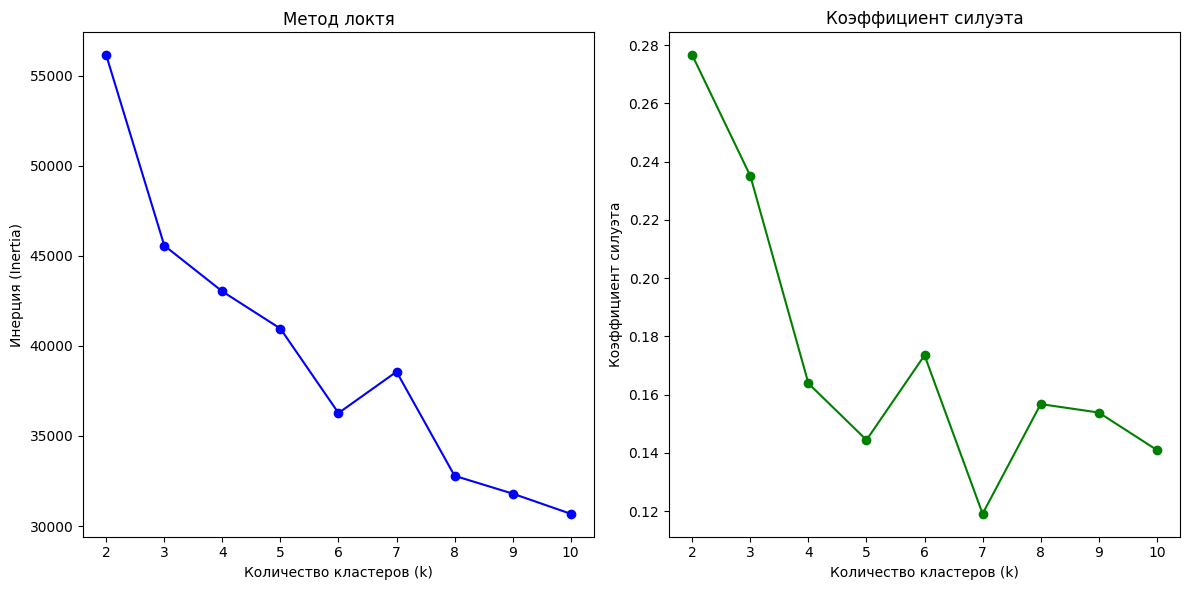

Оптимальное количество кластеров: 2


In [ ]:
# Метод локтя для выбора количества кластеров
inertia = []
silhouette_scores = []

# Пробуем разные значения k (количество кластеров)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Визуализация метода локтя
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o', color='blue')
plt.title("Метод локтя")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Инерция (Inertia)")

# Визуализация коэффициента силуэта
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title("Коэффициент силуэта")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Коэффициент силуэта")
plt.tight_layout()
plt.show()

# Определение оптимального количества кластеров
optimal_k = 2  # Примерный выбор по методу локтя и силуэту
print(f"Оптимальное количество кластеров: {optimal_k}")

# Кластеризация с выбранным числом кластеров
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Добавляем информацию о кластерах в датафрейм
df['cluster'] = clusters

Для разных значений k (количество кластеров) была вычислена инерция и коэффициент силуэта.

Метод локтя позволяет визуализировать, где происходят резкие изменения в инерции, что помогает выбрать оптимальное количество кластеров.

Коэффициент силуэта измеряет качество кластеризации, где более высокие значения указывают на лучшее разделение.

Выбрано количество кластеров k=2, так как это оптимальное значение по методу локтя и силуэту.

2. Визуализация кластеров с использованием PCA

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

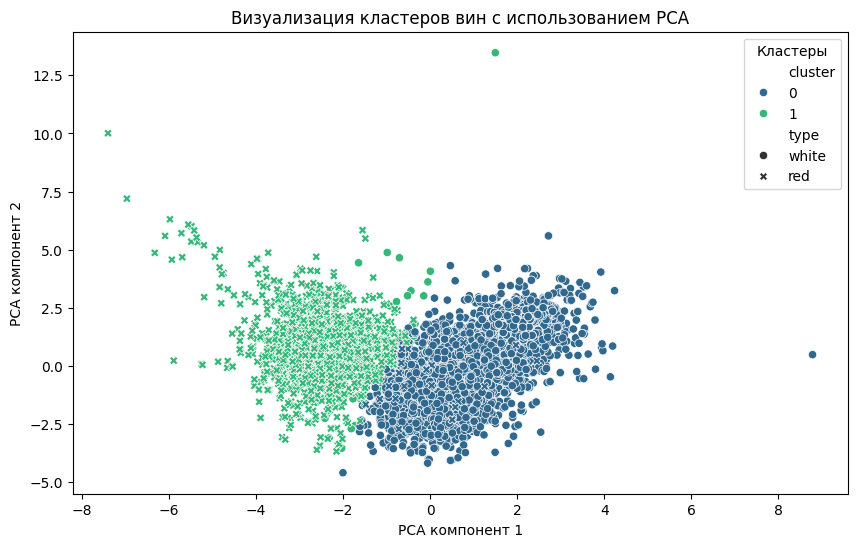

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['cluster'], palette='viridis', style=df['type'])
plt.title("Визуализация кластеров вин с использованием PCA")
plt.xlabel("PCA компонент 1")
plt.ylabel("PCA компонент 2")
plt.legend(title='Кластеры')
plt.show()

Данные лучше всего разделяются на две естественные группы: красные и белые вина, если эти два типа имеют сильно различающиеся характеристики.